## Fire in the nature park

***Problem Summary***

The administration of the nature park Montesinho in north-east Portugal wants to predict wild fires based on wheather data of the Fire-Wheather-Index (FWI). The aim is to recognize the affected area and consequently the intensity of the imminent wild fire as early as possible in order to be able to adequatly assess the danger caused by the fire. To this aim, data from 517 wild fires have been collected. The features are summarized below

***Features***

- X (X-coordinate of the fire in the park: 1 to 9)
- Y (Y-coordinate of the fire in the park: 2 to 9)
- Month month: ”jan“ to ”dec“)
- day (day: ”mon“ bis ”sun“)
- FFMC (FFMC index of the FWI system: 18.7 to 96.2)
- DMC (DMC index of the FWI system: 1.1 bis 291.3)
- DC (DC index of the system: 7.9 bis 860.6)
- ISI (ISI index of the FWI systems: 0.0 to 56.1)
- temp (temperature in degrees Celsius: 2.2 to 33.3)
- RH (relative humidity in %: 15 to 100)
- wind (wind velocity in km/h: 0.4 to 9.4)
- rain (rainfall in mm/m2: 0.0 to 6.4)
- **area (forest area that has been burnt in hectare: 0.09 to 1090.84)**

***Goal***

Predict **area** that has been burnt in hectare

Load the data into Python and preprocess them appropriately; perform an adequate normalization of the features. For example, he label area is distributed very non-uniformly such that a transformation such as area0 = log(1 + area) is appropriate. Identify and implement a suitable learning method in Python. Train and evaluate the model. Propose a trivial baseline model with which you can compare your model’s performance. Provide the RMSE (root mean square error) of your model and the baseline model obtained with 10-fold cross-validation. Provide a short documentation and motivation of each of your steps.



In [69]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

In [70]:
#Path="C:\\Users\\bsubramani\\Downloads\\Python Scripts\\ML Project\\"
Path="C:\\Users\\Dell\\Documents\\Python Scripts\ML\\ML Project\\"
Filename='fires.csv'
Data=pd.read_csv(Filename)

In [71]:
###### Functions

def renames(feature='day', nbr=12):
    Dict_cols={}
    for i in range(nbr):
        Dict_cols[i]=feature+str(i)
    return Dict_cols
    

In [72]:
Data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [73]:
Data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [74]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [75]:
Data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


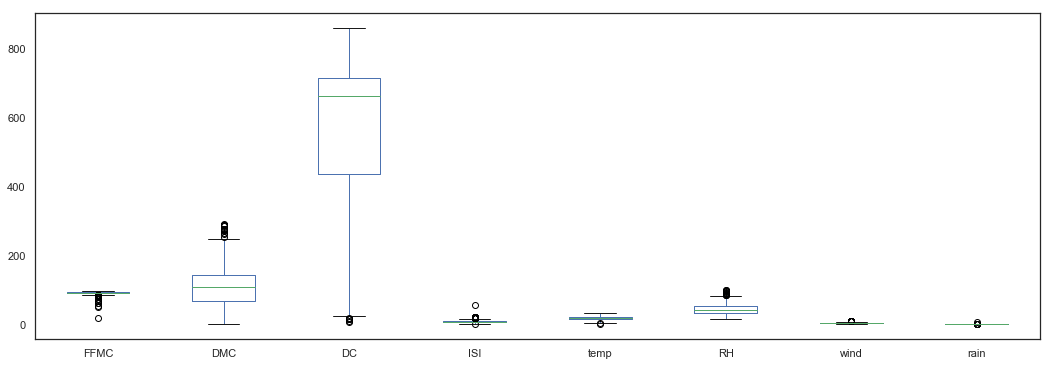

In [76]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
Data[ncols].plot(kind="box", figsize=(18,6))

### Findings from description

- FMCC is mostly between of 90 to 96. But minimum is 18. So there are couple of outliers in this.
- Same scenario for Rain


## Nature Park Map & Affected place

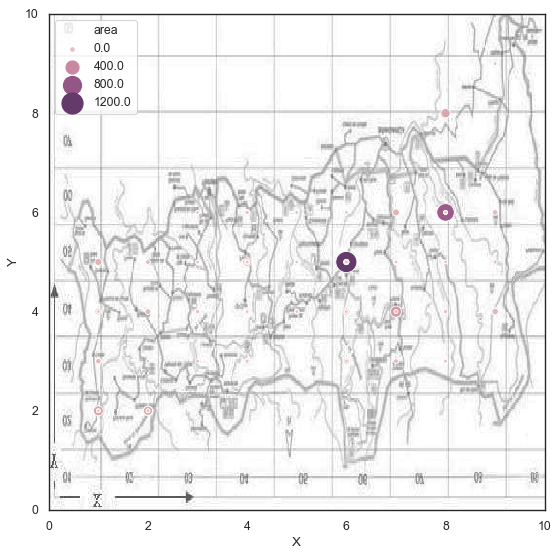

In [77]:
import matplotlib.image as mpimg
import seaborn as sns

from matplotlib.pyplot import figure
figure(num=None, figsize=(8,16), dpi=80, facecolor='w', edgecolor='k')

map_img = mpimg.imread('images\map.png') 
plt.imshow(map_img, zorder=0, extent=[0, 10, 0, 10])
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='X', y='Y',size='area', hue='area', data=Data,sizes=(10, 360),palette=cmap)
plt.show()

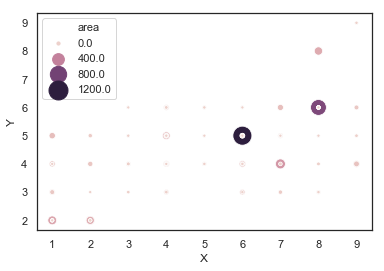

In [78]:
sns.scatterplot(x='X', y='Y',size='area', hue='area', data=Data,sizes=(10, 360))

### Findings from map plot

- Area (6,5) & (8,6) is most affected place and other places are affected very less. So dependent variable data is skewed in right side.


## Encoding the categorical columns (Day, Month, X and Y)

In [79]:
#Encoding the categorical columns
dummies= pd.get_dummies(Data['day'])
Encoded_Data=Data.join(dummies)
#Data1=Data1.rename(index=str, columns=renames('day_',Data['day'].max()+1))

dummies= pd.get_dummies(Data['month'])
Encoded_Data=Encoded_Data.join(dummies)
#Data1=Data1.rename(index=str, columns=renames('month_',Data['month'].max()+1))

dummies= pd.get_dummies(Data['X'])
Encoded_Data=Encoded_Data.join(dummies)
Encoded_Data=Encoded_Data.rename(index=str, columns=renames('X_',Data['X'].max()+1))

dummies= pd.get_dummies(Data['Y'])
dummies=dummies.rename(index=str, columns=renames('Y_',Data['Y'].max()+1))
Encoded_Data=Encoded_Data.join(dummies)

Encoded_Data=Encoded_Data.drop(columns=['day','month','X','Y','fri', 'dec'])

#print(Encoded_Data.columns)
#Encoded_Data.head()

Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2',       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4',       'Y_5', 'Y_6', 'Y_8', 'Y_9']

## Correlation Study

In [80]:
#Data['X']=Data['X'].astype('object', copy=True)
#Data['Y']=Data['Y'].astype('object', copy=True)
#Data['month']=Data['month'].astype('object', copy=True)
#Data['day']=Data['day'].astype('object', copy=True)

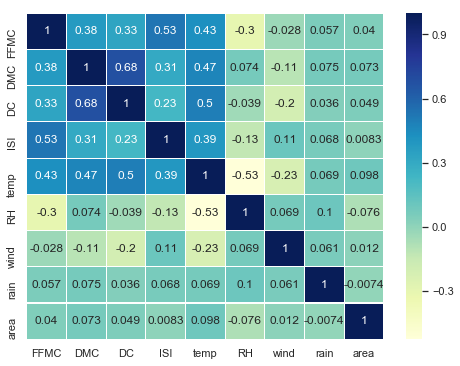

In [81]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
cm = np.corrcoef(Data[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

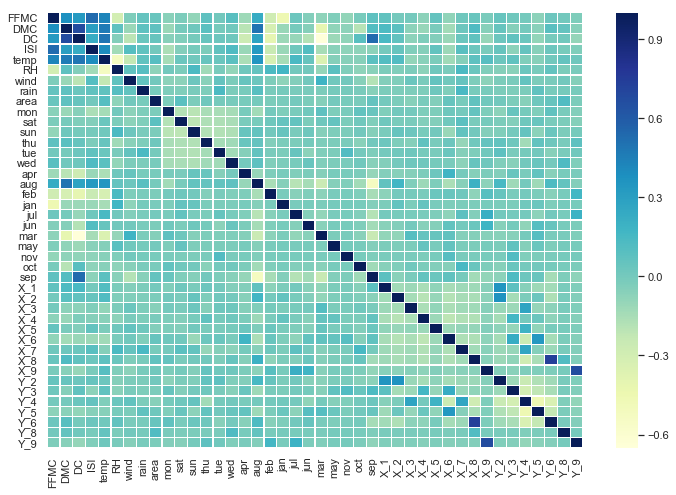

In [82]:
ncols=Encoded_Data.columns
cm = np.corrcoef(Encoded_Data.values.T) 
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=False,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

#### - All other independent columns are not dependent

### Finding the pattens

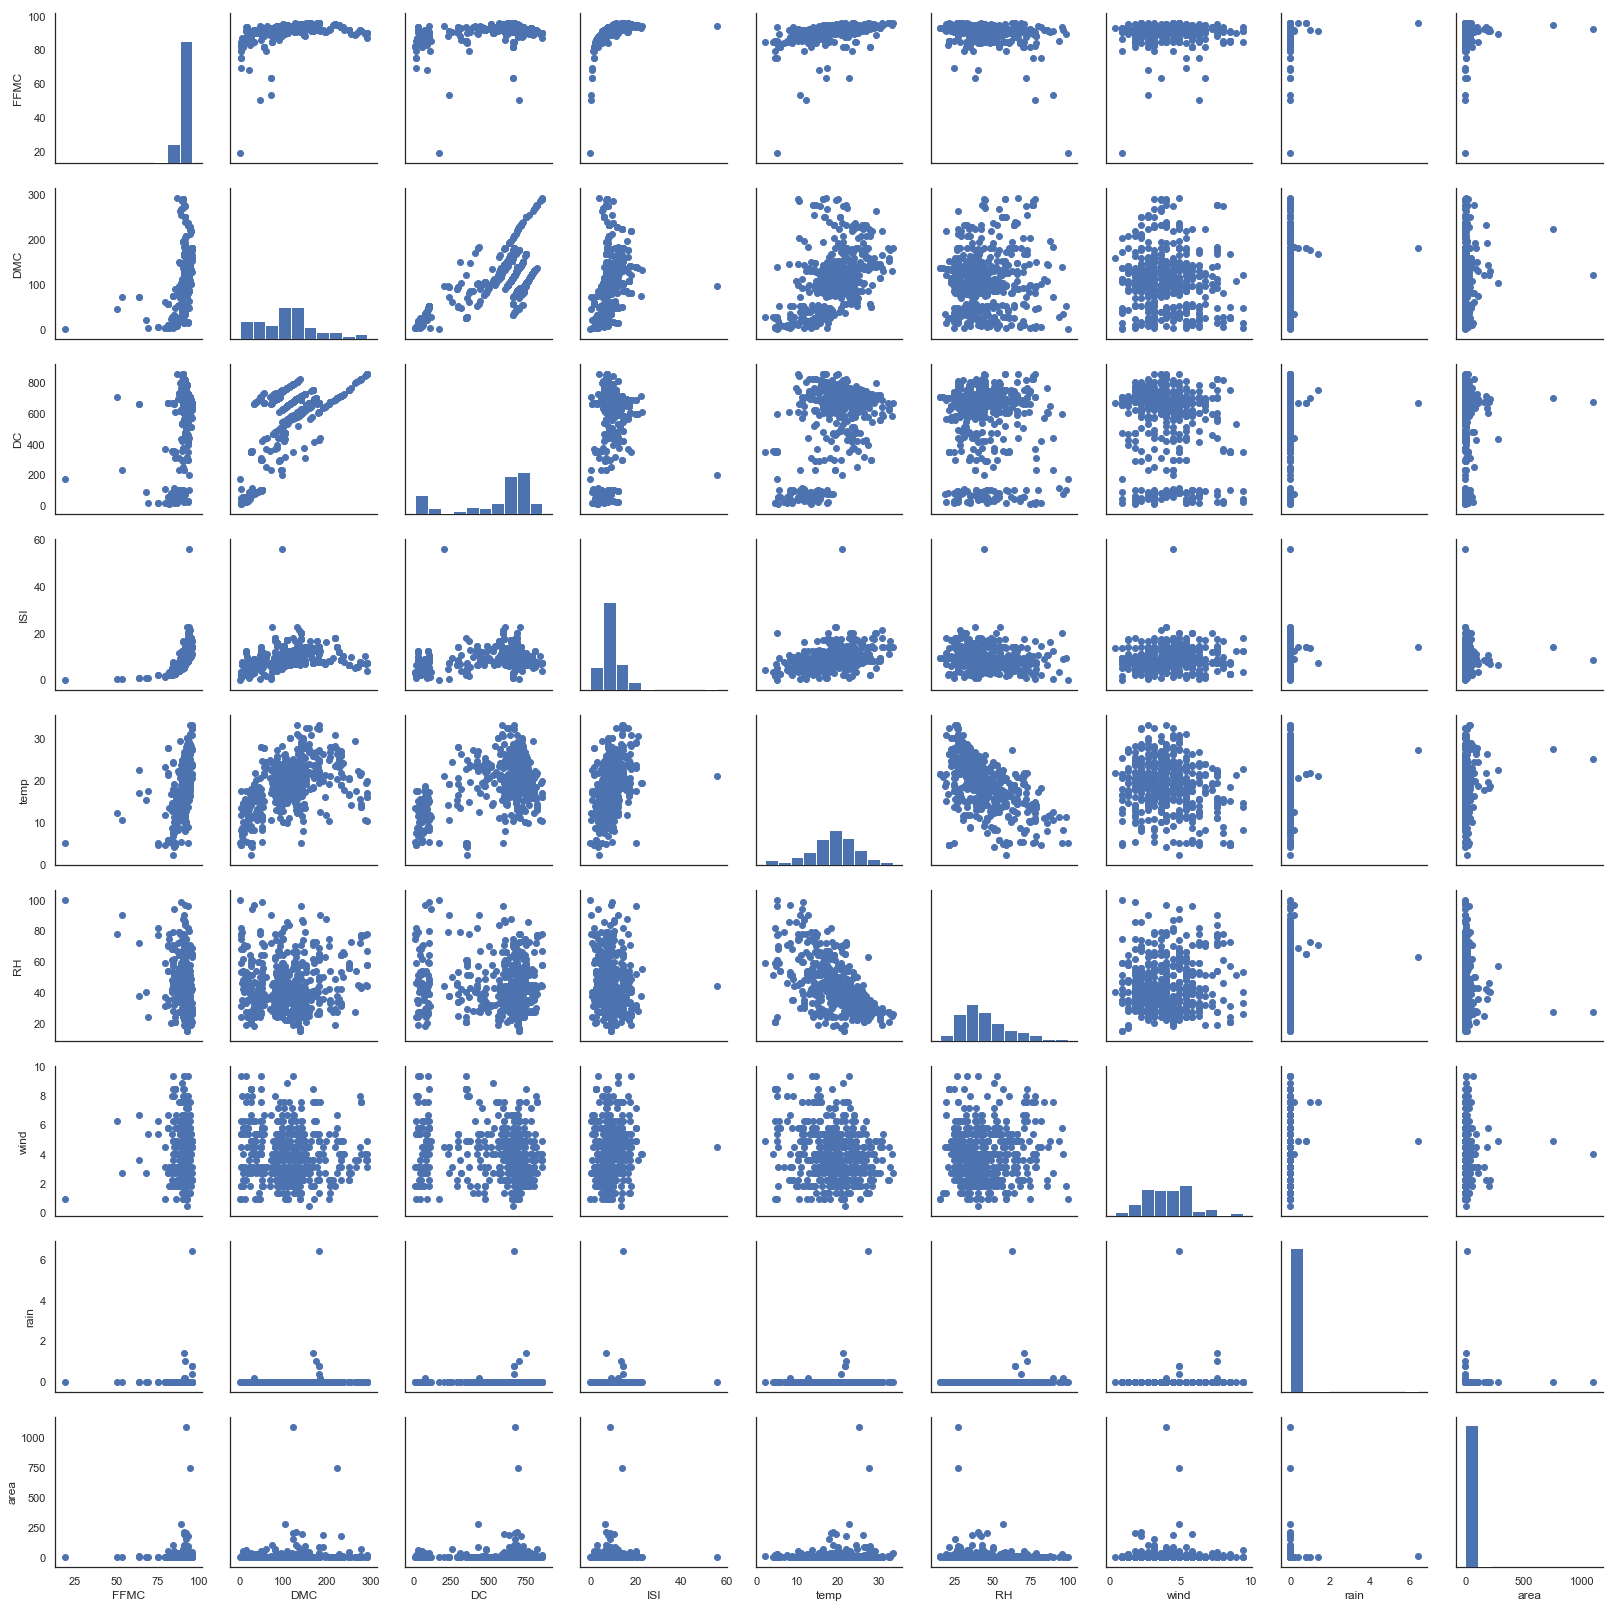

In [83]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain',"area"]
sns.set(style="white")

g = sns.PairGrid(Data[ncols])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### log transformation 

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

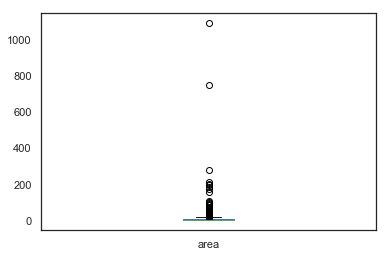

In [84]:
Data["area"].plot(kind='box')

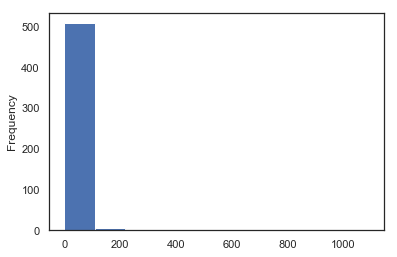

In [85]:
# Fired area in hitogram
Data["area"].plot(kind='hist', bins=10)

In [18]:
# Log Transformation
Data["area"]=[ 0 if np.isinf(x) else x for x in (Data["area"]+1).apply(np.log) ]
Encoded_Data["area"]=[ 0 if np.isinf(x) else x for x in (Encoded_Data["area"]+1).apply(np.log) ]

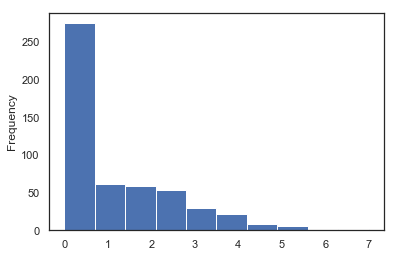

In [19]:
Data["area"].plot(kind='hist', bins=10)

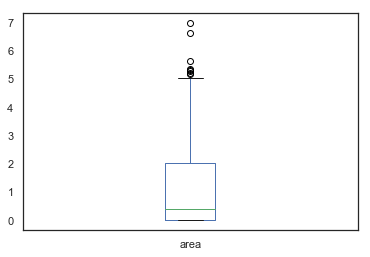

In [20]:
Data["area"].plot(kind='box')

In [94]:
Data["area"].quantile(.80)

8.822000000000001

In [22]:
thersold=0.8
Data["area"][Data["area"] > Data["area"].quantile(thersold)]=Data["area"].quantile(thersold)
Encoded_Data["area"][Encoded_Data["area"] > Encoded_Data["area"].quantile(thersold)]=Encoded_Data["area"].quantile(thersold)

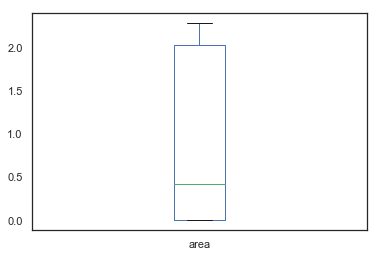

In [23]:
Data["area"].plot(kind='box')

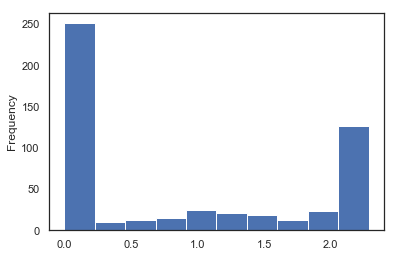

In [68]:
Data["area"].plot(kind='hist', bins=10)

## Outlier detection & handling

In [24]:
allcols=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']

ztrans_data=Data[['X', 'Y', 'month', 'day']]
col_zscores=[]

for col in ncols:
    col_zscore = col + '_zscore'
    ztrans_data[col_zscore] = (Data[col] - Data[col].mean())/Data[col].std(ddof=0)
    col_zscores.append(col_zscore)

In [25]:
for col in ncols:
    print(col+ ' column has  '+str(len(Data[np.abs(ztrans_data[col+"_zscore"])>3][col]))+" outliers")
    Data[np.abs(ztrans_data[col+"_zscore"])>3][col]=Data[col].median()

FFMC column has  7 outliers
DMC column has  0 outliers
DC column has  0 outliers
ISI column has  2 outliers
temp column has  0 outliers
RH column has  5 outliers
wind column has  4 outliers
rain column has  3 outliers


In [26]:
#Data[ncols].plot(kind="box", figsize=(18,6))

## Model Bulding & Evaluation

In [27]:
### Functions for Standardizing, K Fold Validation & Hyperparameter 

In [28]:
def StandardScalerData(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [53]:
def Validations(model,X_col, Data,X_train, X_test, y_train, y_test,coeffs=0):
    y_col="area"
    
    if coeffs==1:
        print("Info :")
        print("_______________________________")
        print("Intercept "+str(model.intercept_))
        print("Cols"+str(X_col))
        print("Coef"+ str(model.coef_))
#     print(model.summary())
#     print(" ")
    
    y_train_pred=model.predict(X_train)
    print("Validation with Train dataset :")
    print("_______________________________")
#     print("R2 Score "+str(r2_score(y_train,y_train_pred)))
    print("RMSE Score "+str(np.sqrt(mean_squared_error(y_train,y_train_pred))))
    print("Actual Data : Min: "+str(y_train.min())+" , Max :"+str(y_train.max()))
    print("Predicted Data : Min: "+str(y_train_pred.min())+" , Max :"+str(y_train.max()))
    
    y_pred=model.predict(X_test)

    print(" ")
    print("Validation with Test dataset :")
    print("_______________________________")
#     print("R2 Score "+str(r2_score(y_test,y_pred)))
    print("RMSE Score "+str(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("Actual Data : Min: "+str(y_test.min())+" , Max :"+str(y_test.max()))
    print("Predicted Data : Min: "+str(y_pred.min())+" , Max :"+str(y_pred.max()))
   
    plt.subplot(2,2,1)
    plt.scatter(y_test,y_pred)

    scores = cross_val_score(model, Data[X_col], Data[y_col], cv=10, scoring="neg_mean_squared_error")
    scores=np.sqrt(abs(scores))

    plt.subplot(2,2,2)
    pd.Series(np.sqrt(scores)).plot(kind="box", label="RMSE");

    
    print(" ")
    print("10 Fold validation :")
    print("_______________________________")
    print("Cross Validation RMSE Scores "+str(scores))
#     print(scores)
    print("Cross Validation RMSE Mean Score "+str(np.mean(scores, dtype=np.float64)))
    
    print("Cross Validation RMSE Mean Score Orginial Value "+str(np.exp(np.mean(scores, dtype=np.float64))))
    
    return np.exp(np.mean(scores))

In [30]:
def param_selection(model,param_grid, X_train, y_train, nfolds=10):
#     print(str(datetime.datetime.now())+" : Starting Param selection")
    grid_search = GridSearchCV(model, param_grid, cv=nfolds,verbose =1)
#     grid_search = GridSearchCVProgressBar(model, param_grid, cv=nfolds) 
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
#     print(str(datetime.datetime.now())+" : Param selection is completed")
    return grid_search

### Separate Train & Test data for linear computations

In [31]:
Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9']
std_cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [55]:
Standarized_Data=Encoded_Data
Standarized_Data[std_cols]=StandardScalerData(Encoded_Data[std_cols])
X_train, X_test, y_train, y_test = train_test_split(Standarized_Data[Encod_ncols], Standarized_Data["area"],  test_size=0.2, random_state=0)

In [33]:
model = LinearRegression(fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Info :
_______________________________
Intercept 2.2648336042979977
Cols['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_8', 'Y_9']
Coef[ 0.04167564  0.07919955 -0.14799503  0.03434676 -0.02995712 -0.02703687
  0.03174821  0.06041293 -0.05781278  0.00420882  0.00512405  0.0128642
  0.09392897 -0.11231533 -1.40741621 -1.46886091 -0.95990391 -2.19133665
 -1.40346392 -1.90378774 -1.69712878 -1.163272   -2.26409865 -1.25003824
 -1.15402462  0.15702923  0.21242759 -0.53081235 -0.1106583  -0.2282252
 -0.07464127 -0.28436296  0.06902512  0.79021813 -0.63613805 -0.06882044
  0.13537925  0.13885748 -0.0216534   1.50589104 -1.05351588]
Validation with Train dataset :
_______________________________
RMSE Score 0.894897801105366
Actual Data : Min: 0.0 , Max :2.28460842060

3.1935317697525623

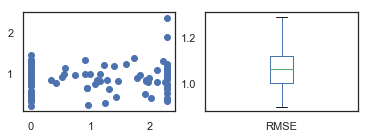

In [56]:
Validations(model,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

In [35]:
X=Standarized_Data[Encod_ncols]
X2 = sm.add_constant(Standarized_Data[Encod_ncols])
est = sm.OLS(Standarized_Data["area"], X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.798
Date:                Sun, 28 Jul 2019   Prob (F-statistic):            0.00280
Time:                        14:33:44   Log-Likelihood:                -682.26
No. Observations:                 517   AIC:                             1445.
Df Residuals:                     477   BIC:                             1614.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FFMC           0.0381      0.063      0.604      0.5

### Lasso

In [36]:
LS_grid_result=param_selection(linear_model.Lasso(),{'alpha':[0.00001, 0.0001, 0.001,0.01,0.5,0.6,0.9],'normalize':[True]}, X_train, y_train,10)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.01, 'normalize': True}


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


In [37]:
LS_grid_result.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Info :
_______________________________
Intercept 0.8617537717360229
Cols['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_8', 'Y_9']
Coef[ 0. -0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0. -0.
 -0. -0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0.
  0.  0.  0.  0. -0.]
Validation with Train dataset :
_______________________________
RMSE Score 0.9683598753869974
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.8617537717360229 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 0.9769263380360018
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.8617537717360229 , Max :0.8617537717360229
 
10 Fold validation :
_________________________

2.7331573611537694

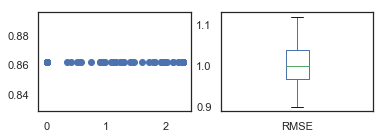

In [57]:
Validations(LS_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

Info :
_______________________________
Intercept 0.9556275229375001
Cols['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_8', 'Y_9']
Coef[ 0.04437121  0.          0.         -0.0106203  -0.09791068 -0.05643902
  0.05972085  0.05249135 -0.          0.         -0.          0.
  0.         -0.         -0.         -0.030628    0.0264615  -0.
  0.         -0.00388718 -0.22394751  0.         -0.         -0.
  0.06946039  0.          0.10033937 -0.37983259  0.         -0.
 -0.         -0.08797231  0.          0.         -0.40700691 -0.08598375
  0.00415547  0.          0.          0.         -0.        ]
Validation with Train dataset :
_______________________________
RMSE Score 0.9315901104744528
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.

2.8695891166814715

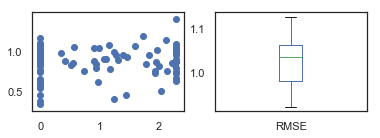

In [58]:
LS_cus = linear_model.Lasso(alpha=0.01)
LS_cus.fit(X_train, y_train)
Validations(LS_cus,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

### Ridge

In [59]:
RD_grid_result=param_selection(linear_model.Ridge(),{'alpha':[0.00001, 0.0001, 0.001,0.01,0.5,0.6,0.9],'normalize':[True]}, X_train, y_train,10)
RD_grid_result.best_estimator_

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.9, 'normalize': True}


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished


Ridge(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

Info :
_______________________________
Intercept 0.8812427233301556
Cols['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_8', 'Y_9']
Coef[ 0.01484794 -0.00129814  0.0043504  -0.00302345 -0.03123942 -0.01587033
  0.03992405  0.02919972  0.00307707  0.00264337 -0.01325983  0.00648401
  0.044581   -0.03311931  0.02065553 -0.06736712  0.20022785 -0.45739099
 -0.0176939  -0.19321747 -0.13472264  0.12671995 -0.47791054 -0.085735
  0.04549213  0.04172467  0.09277249 -0.22535741  0.03291009 -0.03631137
  0.01095648 -0.06937626  0.03647085  0.23279386 -0.25174135 -0.05922016
  0.04695375  0.06235775  0.036217    0.78326651 -0.23022009]
Validation with Train dataset :
_______________________________
RMSE Score 0.9290107075844887
Actual Data : Min: 0.0 , Max :2.2846084206

2.9187560318556396

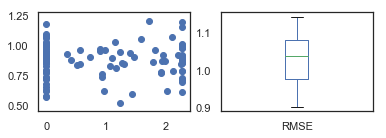

In [60]:
Validations(RD_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

Info :
_______________________________
Intercept 2.2315346789998296
Cols['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_8', 'Y_9']
Coef[ 0.04242502  0.07773214 -0.14210776  0.03372946 -0.03355045 -0.02936958
  0.03287925  0.06068427 -0.05655135  0.00431482  0.0062209   0.01280561
  0.09387011 -0.11147004 -1.36749447 -1.43649817 -0.92092556 -2.13750073
 -1.36717262 -1.86317468 -1.66048872 -1.11607942 -2.20609113 -1.22399989
 -1.12571734  0.1579177   0.21307911 -0.5308087  -0.10870711 -0.22775769
 -0.07474852 -0.28384765  0.06790327  0.7869696  -0.63617641 -0.06943083
  0.13582316  0.13904824 -0.01776714  1.49466306 -1.04616007]
Validation with Train dataset :
_______________________________
RMSE Score 0.8949074146413524
Actual Data : Min: 0.0 , Max :2.28460842

3.1915565867548374

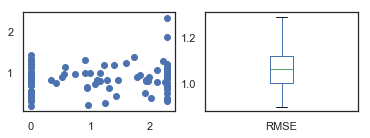

In [61]:
RD_cus = linear_model.Ridge(alpha=0.01)
RD_cus.fit(X_train, y_train)
Validations(RD_cus,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

### SVM

In [43]:
SVR_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,150], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 'kernel':['linear','rbf'],'epsilon': [ 0.001, 0.01, 0.1,1, 10]}
SVR_grid_result=param_selection(SVR(),SVR_param_grid, X_train, y_train,5)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed: 14.4min finished


In [44]:
SVR_grid_result.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Validation with Train dataset :
_______________________________
RMSE Score 0.1415666583430401
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.0677321276946874 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 0.9988758385692782
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.09971084351110382 , Max :2.184574496722477
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.01926309 1.00729729 0.85894227 1.10311844 1.29968496 1.02584429
 0.91523629 1.10010702 0.92288776 1.03480287]
Cross Validation RMSE Mean Score 1.0287184267548672
Cross Validation RMSE Mean Score Orginial Value 2.7974783629623854


2.7974783629623854

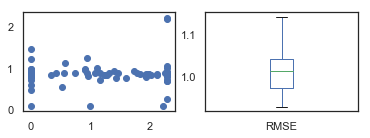

In [62]:
Validations(SVR_grid_result.best_estimator_ ,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0)

Validation with Train dataset :
_______________________________
RMSE Score 0.14752154736234643
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: -0.015022888380759936 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 1.0499827258038774
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.03862322160051013 , Max :2.1845496580888324
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.08902542 1.07930764 0.91122587 1.14403472 1.38344775 1.07186994
 0.98436909 1.15531756 0.99494449 1.10252861]
Cross Validation RMSE Mean Score 1.0916071094697846
Cross Validation RMSE Mean Score Orginial Value 2.979057899628066


2.979057899628066

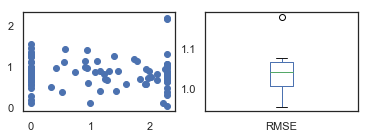

In [63]:
# SVR_cus = SVR(C=10, cache_size=200, coef0=0.0
#               , degree=3, epsilon=1, gamma=0.0001,  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR_cus=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR_cus.fit(X_train, y_train)
Validations(SVR_cus,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0 )

### Decision Tree

In [65]:
Standarized_Data2=Data
Standarized_Data2[ncols]=StandardScalerData(Data[ncols])
X_train, X_test, y_train, y_test = train_test_split(Standarized_Data2[ncols], Standarized_Data2["area"],  test_size=0.40, random_state=0)

In [48]:
DT_param_grid = {'criterion': ['mse', 'mae'],'max_depth': range(1,10,2),'min_samples_split': range(2,10,2) ,'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100]}
DT_grid_result=param_selection(tree.DecisionTreeRegressor(),DT_param_grid, X_train, y_train,10)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mse', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 100, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   23.3s finished


Validation with Train dataset :
_______________________________
RMSE Score 0.9433558140024542
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.767877535062706 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 1.0150563685679272
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.767877535062706 , Max :0.9491015158695004
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [0.978528   1.0425893  0.84455132 1.20725707 1.35269785 1.04700301
 0.89660842 1.14544858 0.98016073 1.08857904]
Cross Validation RMSE Mean Score 1.0583423322302516
Cross Validation RMSE Mean Score Orginial Value 2.88159030859237


2.88159030859237

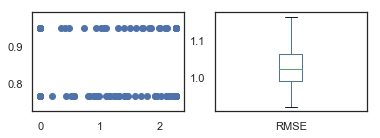

In [66]:
Validations(DT_grid_result.best_estimator_ ,ncols,Standarized_Data2, X_train, X_test, y_train, y_test )

### Random Forest

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
RF_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

RF_grid_result=param_selection(RandomForestRegressor(),RF_param_grid, X_train, y_train,5)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 35.5min finished


In [51]:
RF_grid_result.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Validation with Train dataset :
_______________________________
RMSE Score 0.8733616522956376
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.508204050129138 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 1.0094874997437702
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.540674960200947 , Max :1.963801375612847
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [0.96817263 0.97866538 0.73860922 1.29759968 1.3979996  1.00836836
 0.87046916 1.15507353 0.9955607  1.07754539]
Cross Validation RMSE Mean Score 1.0488063649607975
Cross Validation RMSE Mean Score Orginial Value 2.854242160489178


2.854242160489178

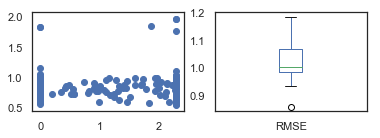

In [67]:
Validations(RF_grid_result.best_estimator_,ncols,Standarized_Data2, X_train, X_test, y_train, y_test)